In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("bodyfat.csv")
df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
df.shape

(252, 15)

In [ ]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


Distribution plots for Density feature


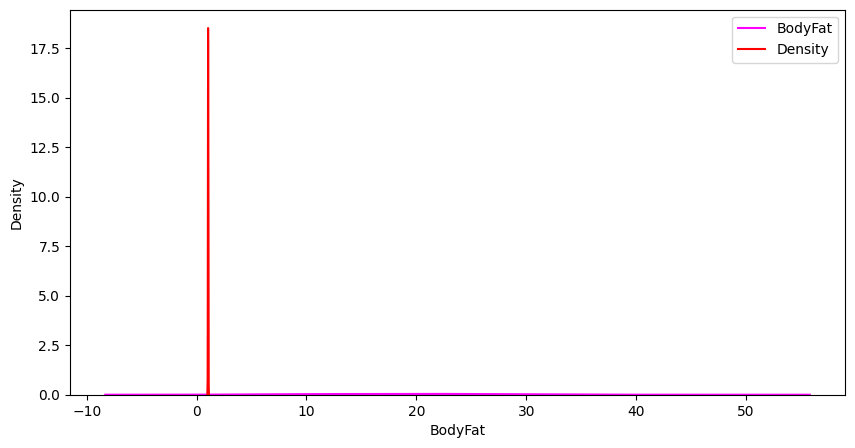



Distribution plots for BodyFat feature


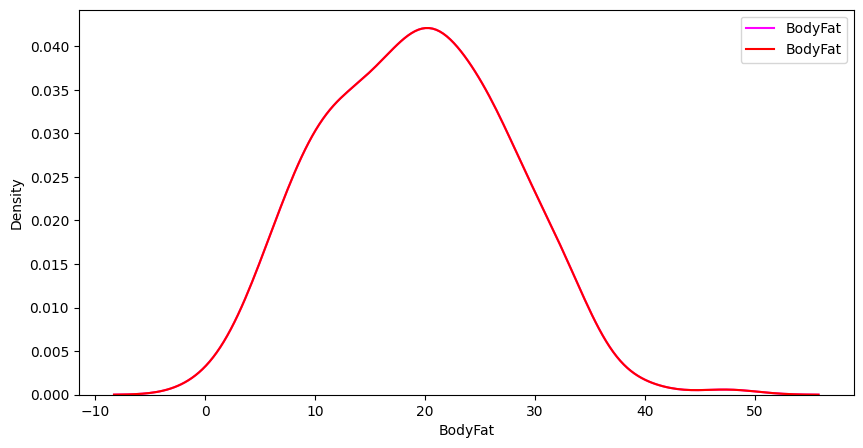



Distribution plots for Age feature


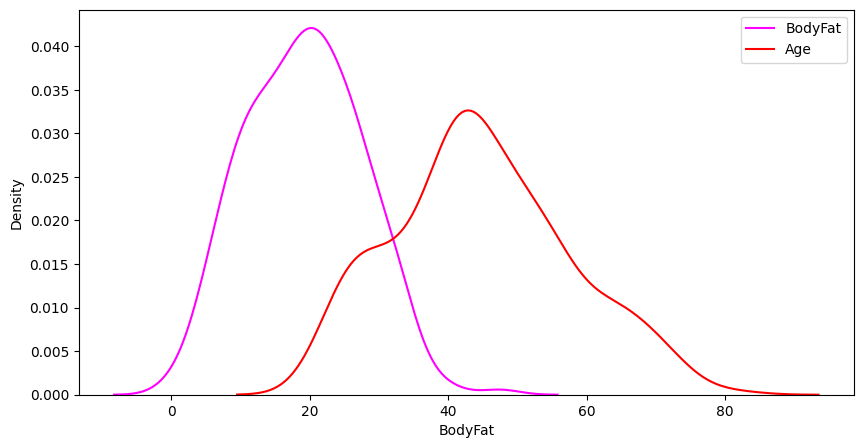



Distribution plots for Weight feature


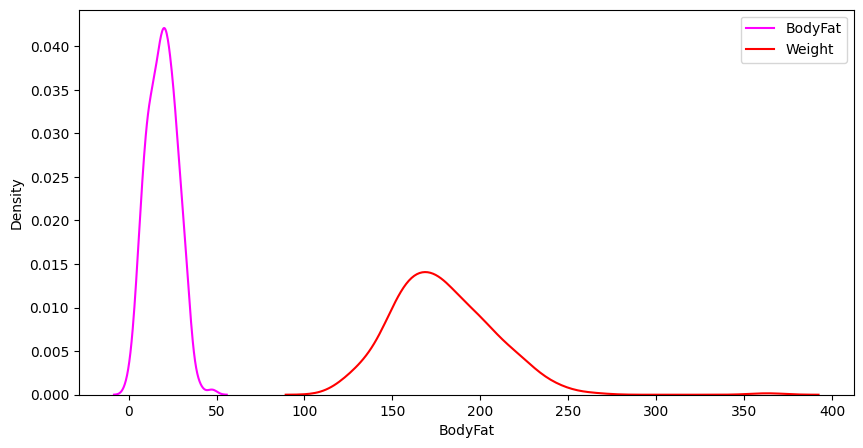



Distribution plots for Height feature


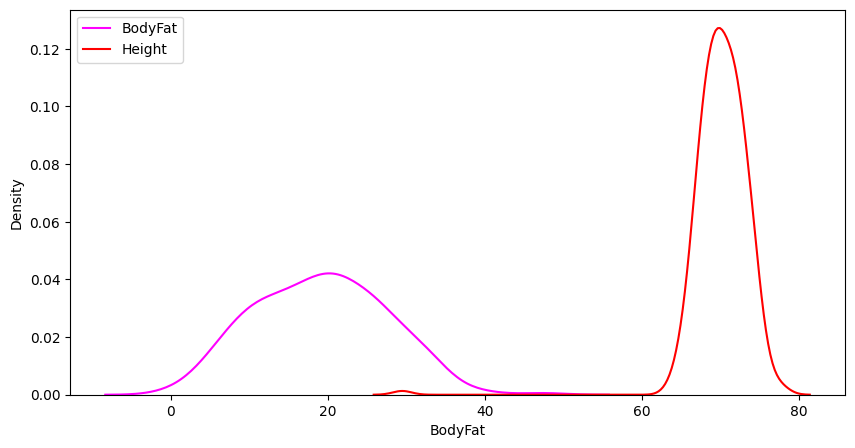



Distribution plots for Neck feature


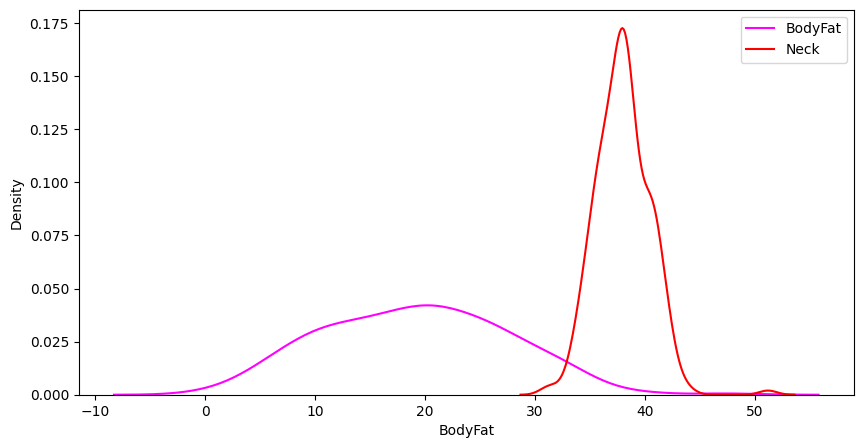



Distribution plots for Chest feature


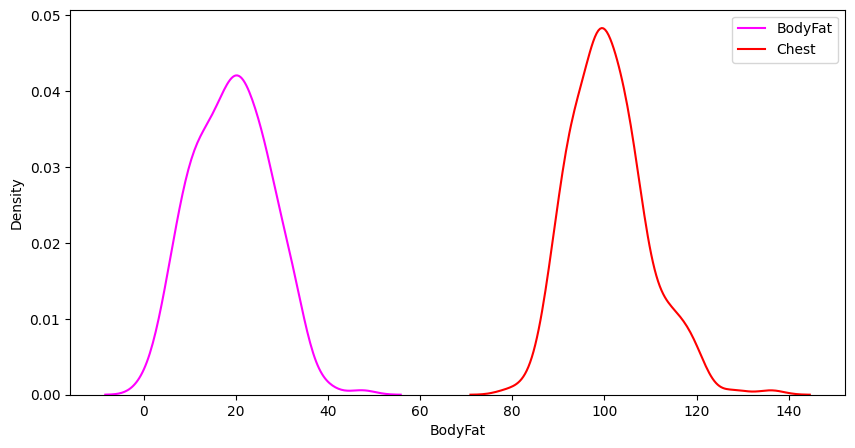



Distribution plots for Abdomen feature


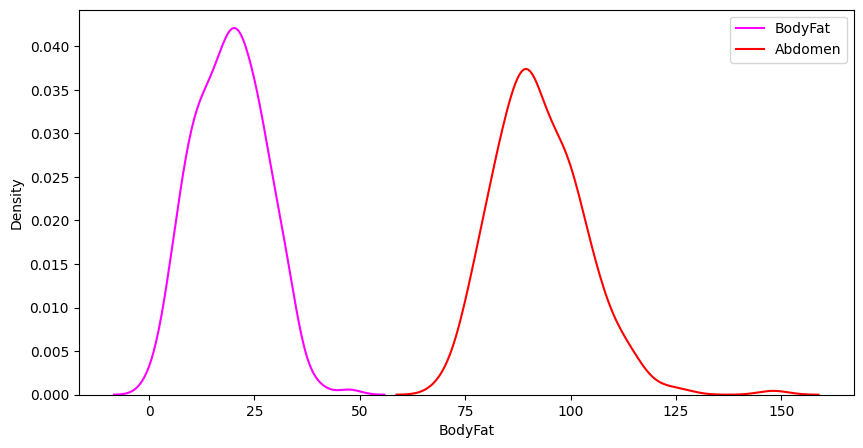



Distribution plots for Hip feature


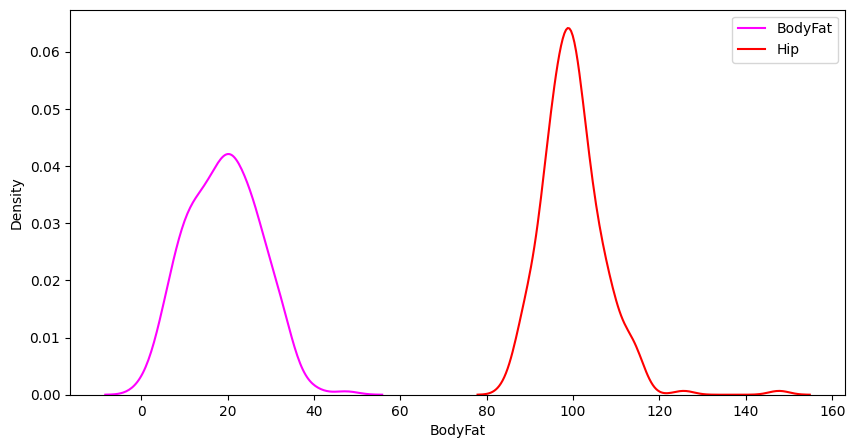



Distribution plots for Thigh feature


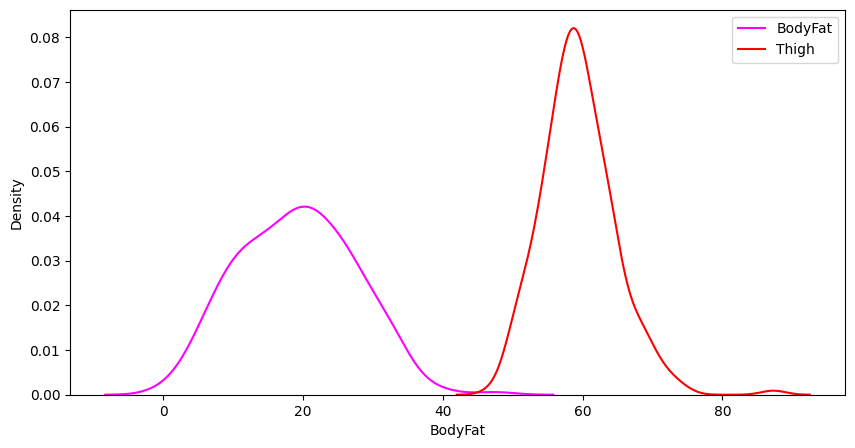



Distribution plots for Knee feature


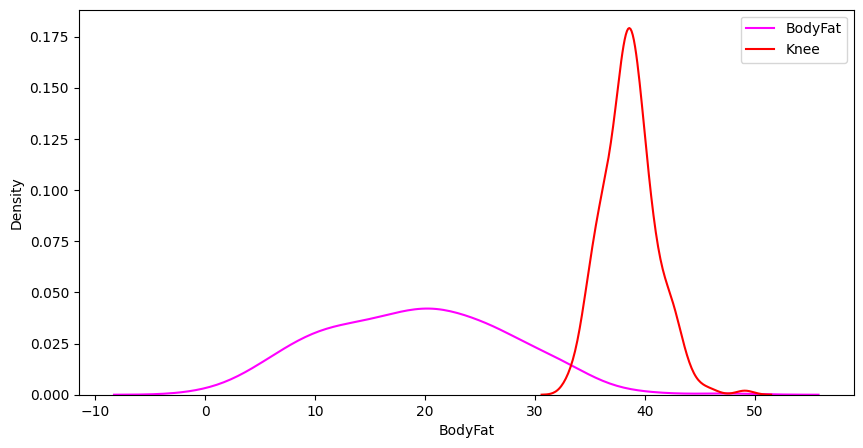



Distribution plots for Ankle feature


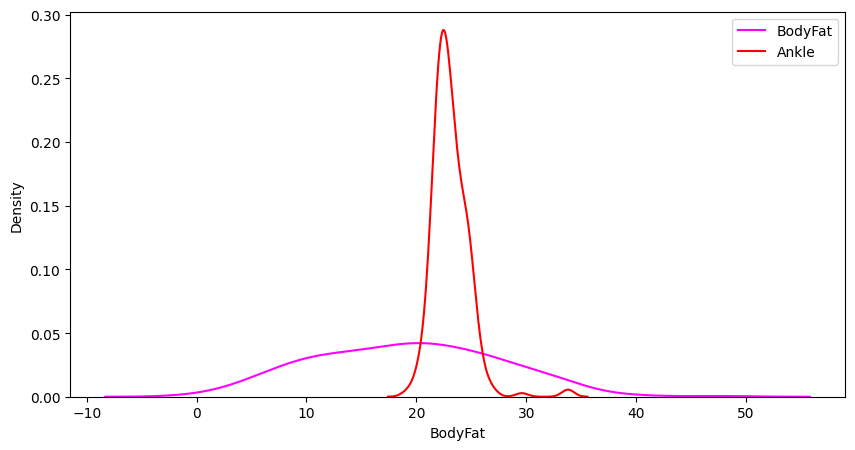



Distribution plots for Biceps feature


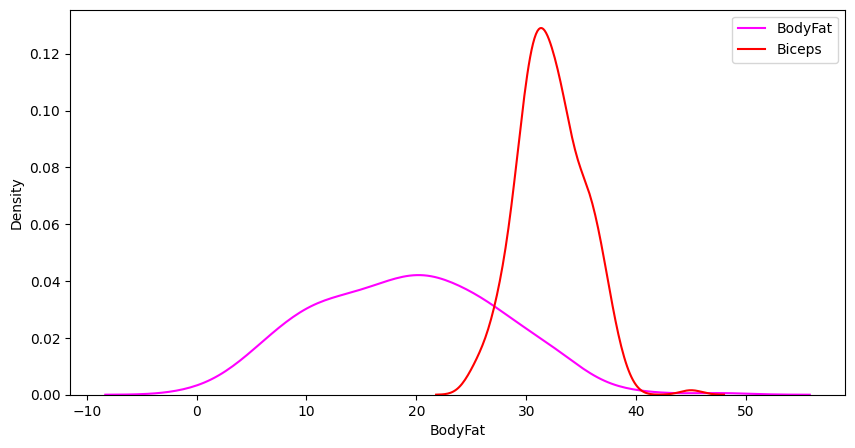



Distribution plots for Forearm feature


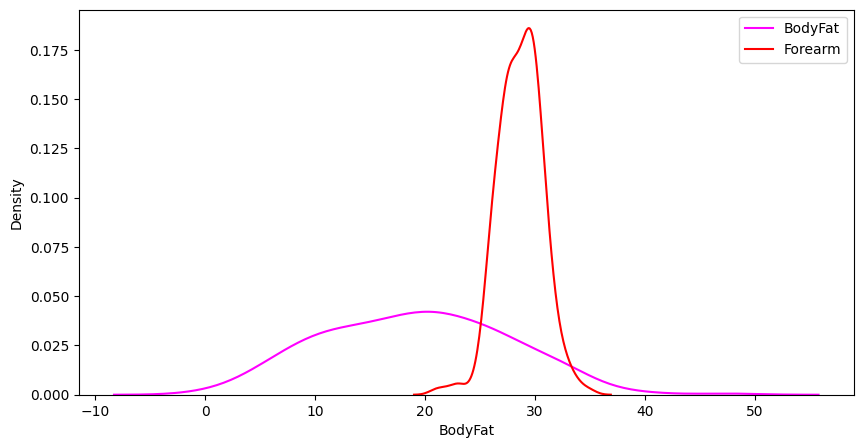



Distribution plots for Wrist feature


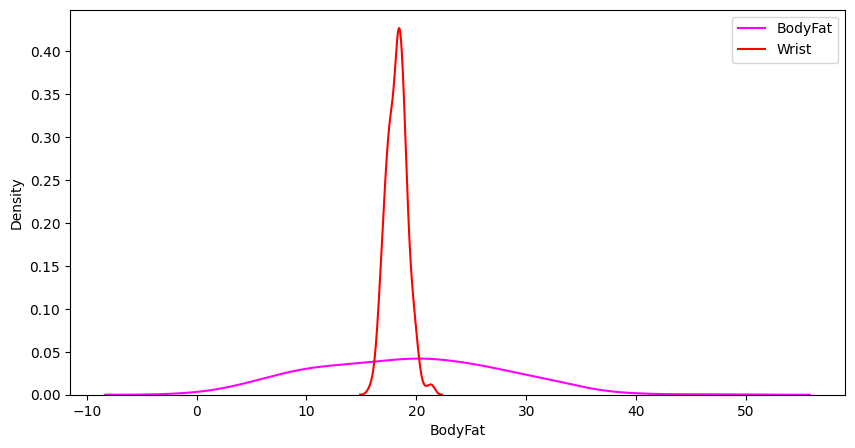

In [ ]:
def plot_distplot(col):

  plt.figure(figsize=(10,5))
  sns.kdeplot(df['BodyFat'], color = 'magenta', label = 'BodyFat')
  sns.kdeplot(df[col], color = 'red', label = col)
  plt.legend()
  plt.show()

cols = list(df.columns)

for i in cols:
  print("="*150,'\n')
  print(f'Distribution plots for {i} feature')
  plot_distplot(i)
  print("="*150,'\n')

In [ ]:
import scipy.stats as stats


Distribution plots for the feature Density


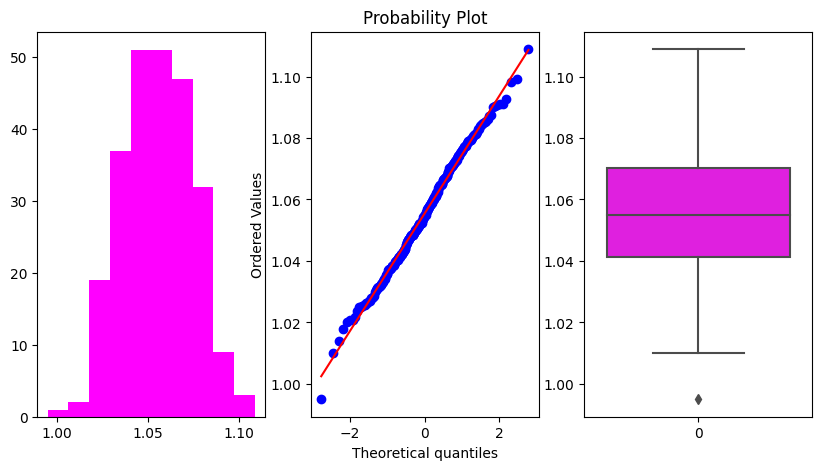



Distribution plots for the feature BodyFat


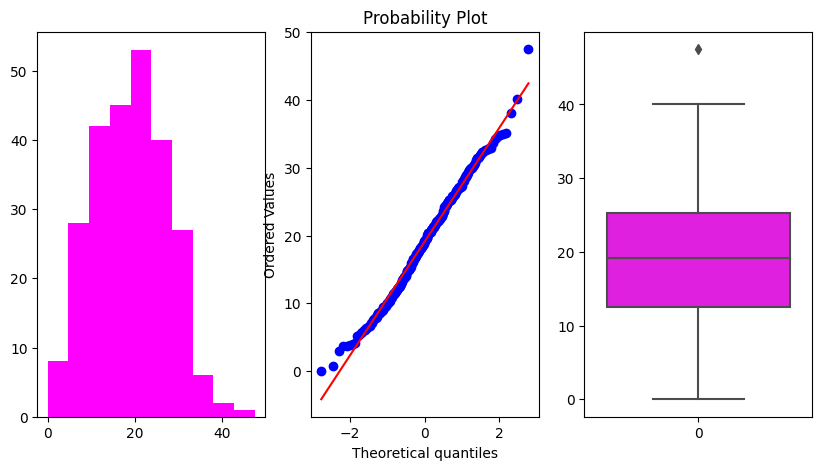



Distribution plots for the feature Age


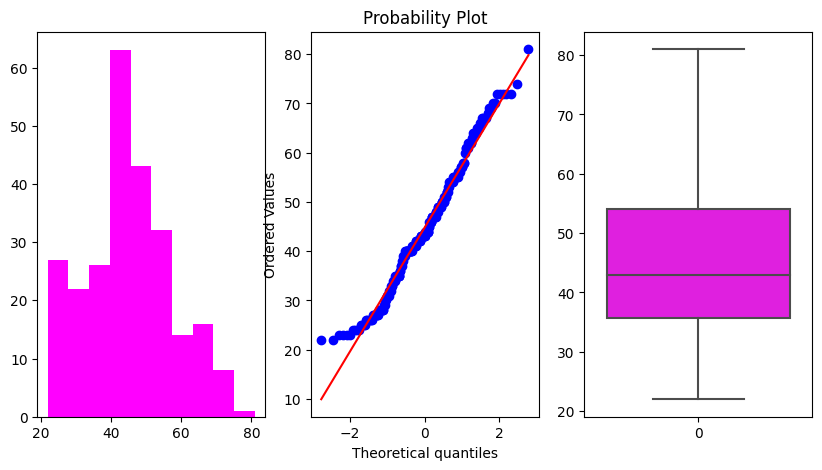



Distribution plots for the feature Weight


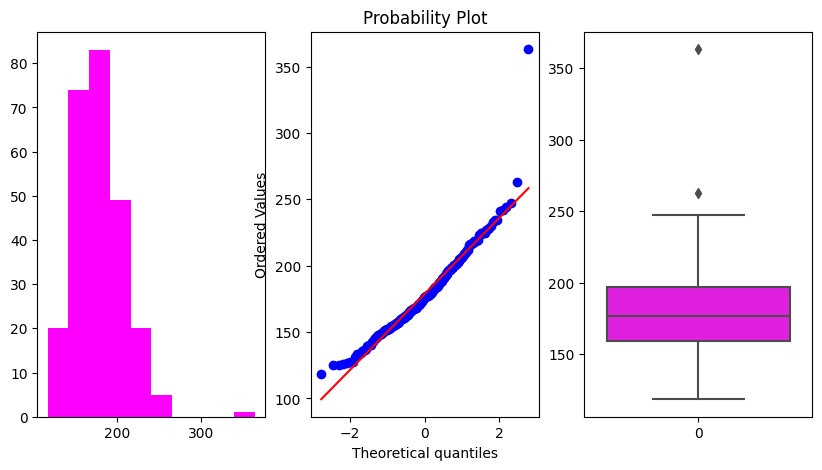



Distribution plots for the feature Height


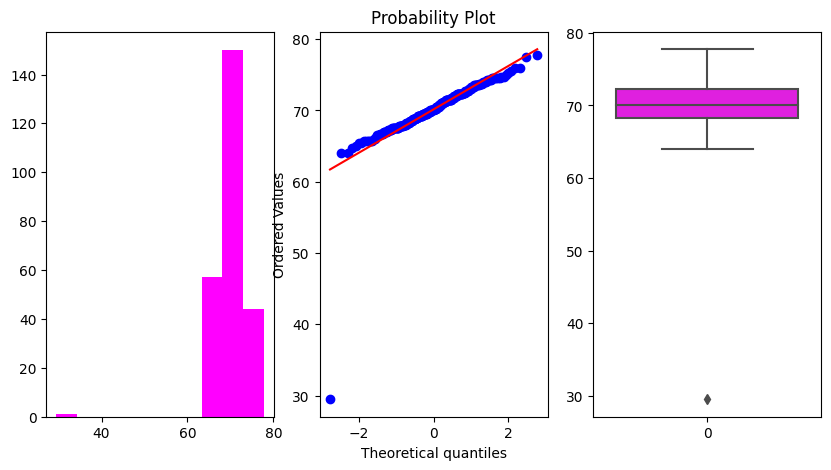



Distribution plots for the feature Neck


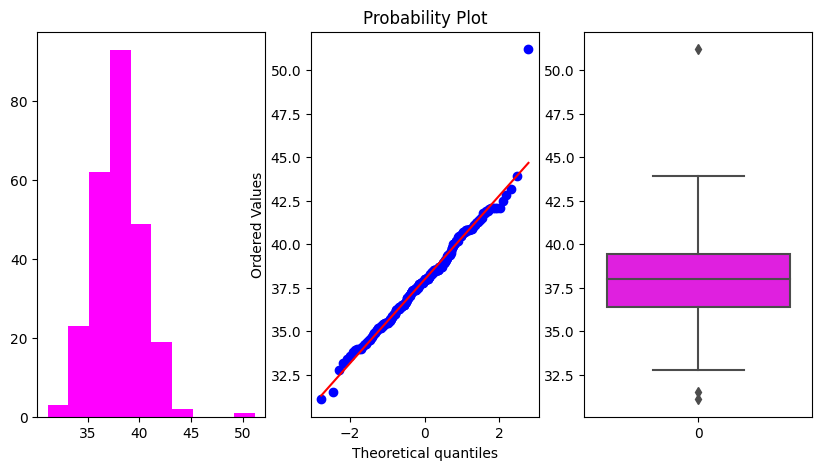



Distribution plots for the feature Chest


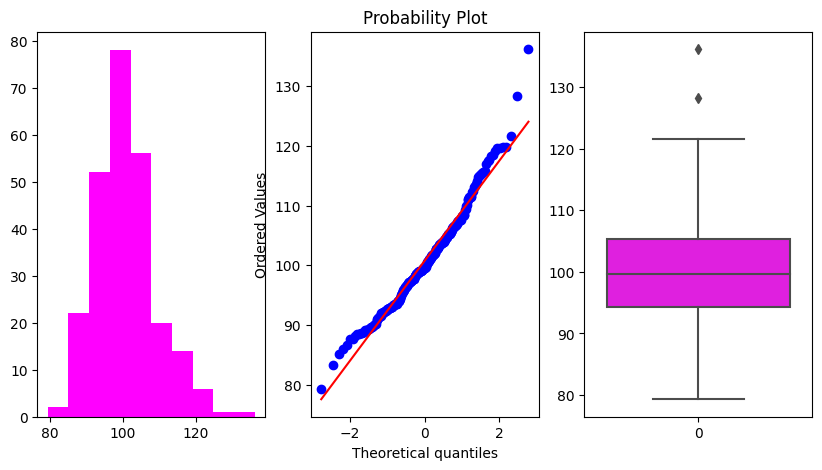



Distribution plots for the feature Abdomen


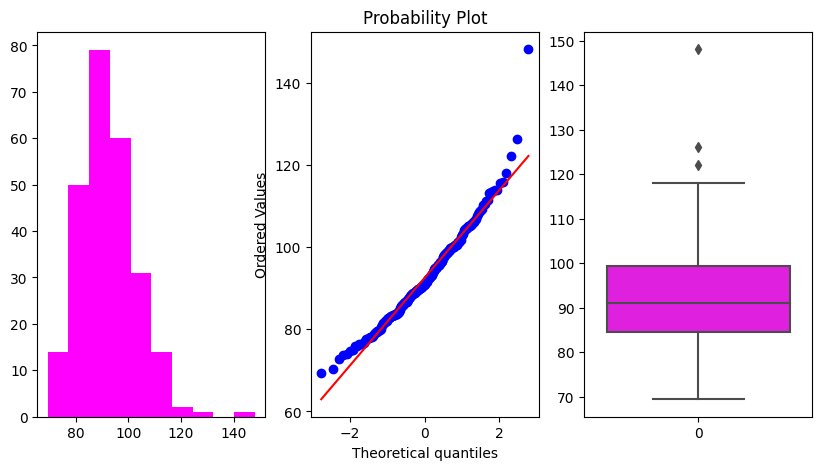



Distribution plots for the feature Hip


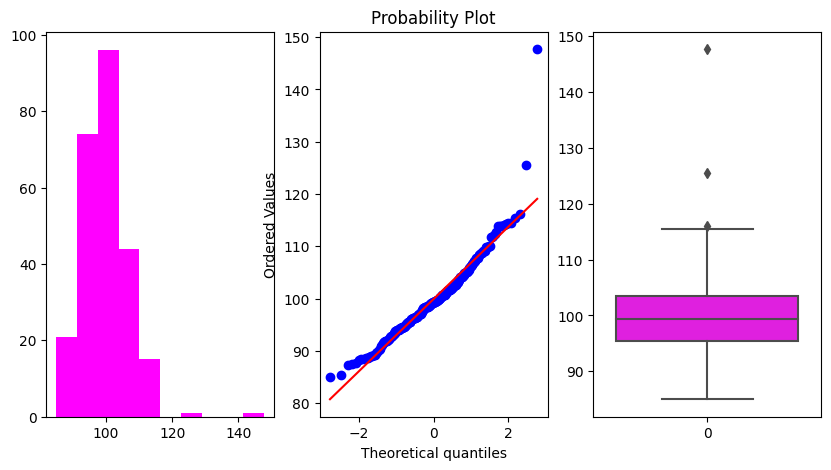



Distribution plots for the feature Thigh


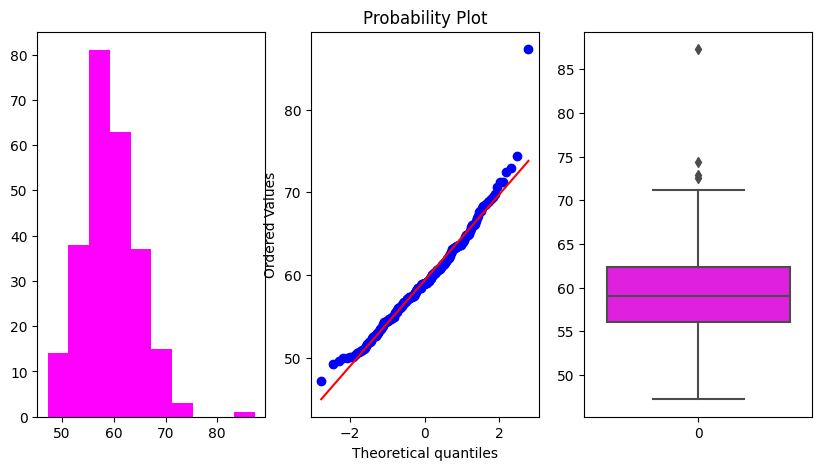



Distribution plots for the feature Knee


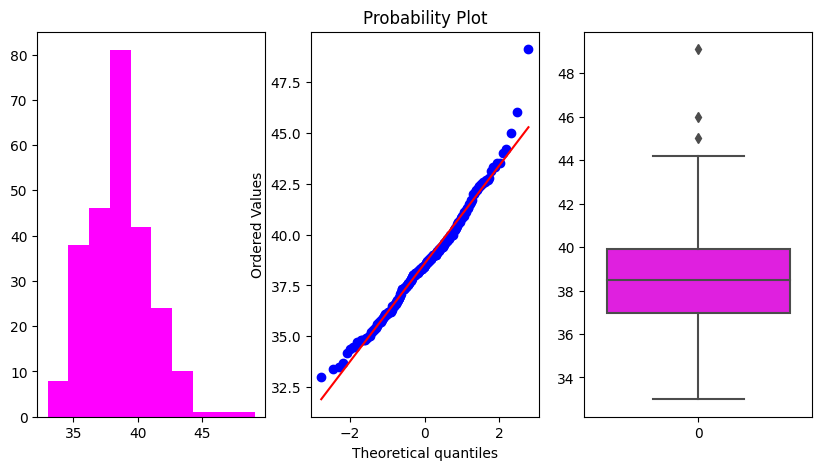



Distribution plots for the feature Ankle


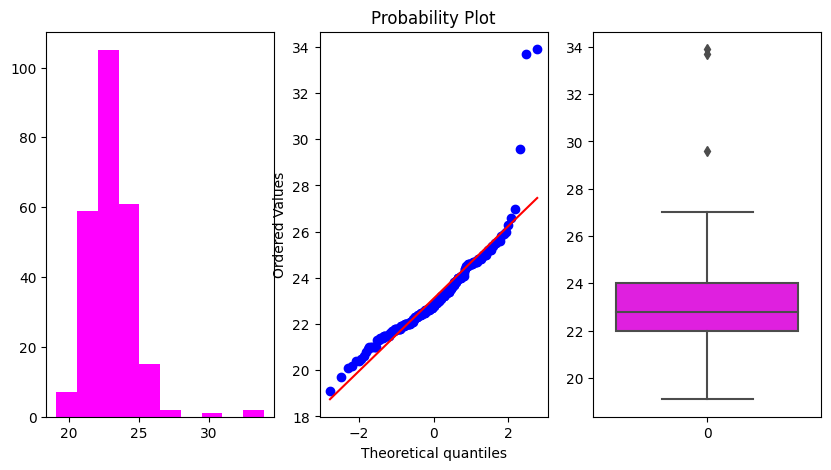



Distribution plots for the feature Biceps


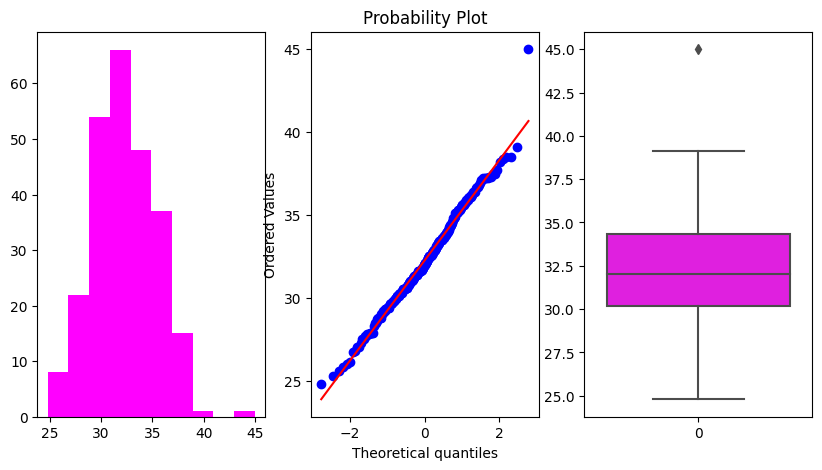



Distribution plots for the feature Forearm


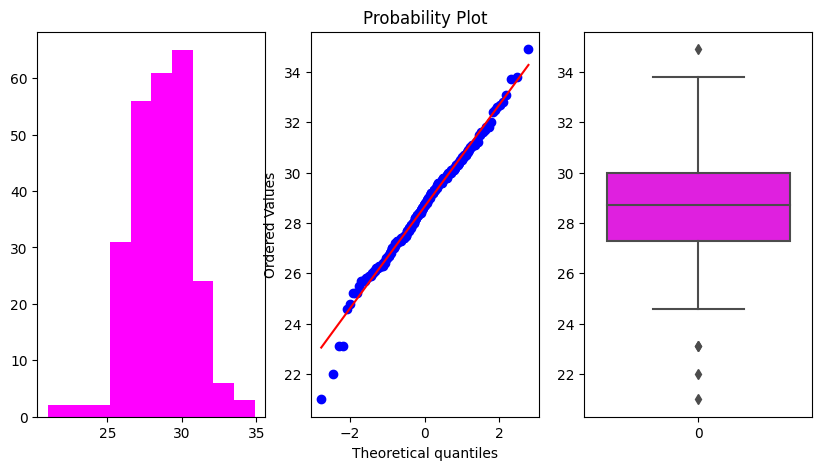



Distribution plots for the feature Wrist


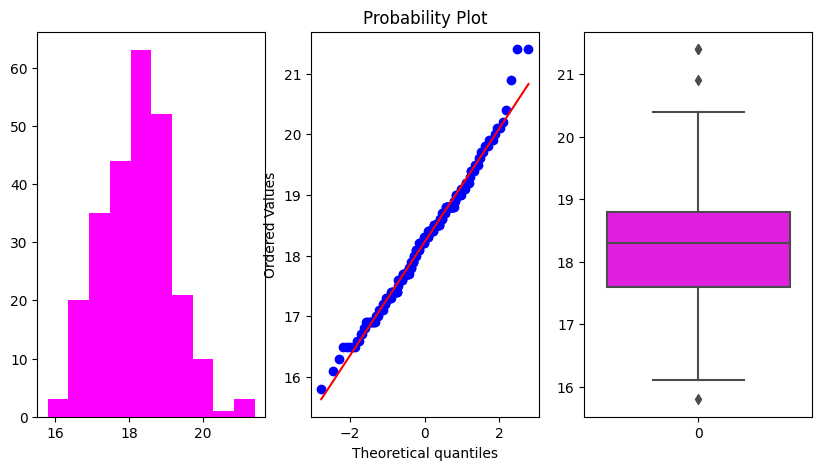

In [ ]:
def drawplots(df, col):

  plt.figure(figsize=(10,5))
  plt.subplot(1,3,1)
  plt.hist(df[col], color='magenta')

  plt.subplot(1,3,2)
  stats.probplot(df[col], dist='norm', plot=plt)

  plt.subplot(1,3,3)
  sns.boxplot(df[col], color='magenta')

  plt.show()


cols = list(df.columns)
for i in range(len(cols)):
  print("="*150,'\n')
  print(f"Distribution plots for the feature {cols[i]}")
  drawplots(df, cols[i])
  print("="*150,'\n')


### Checking Outliers

In [ ]:
upperlimit = []
lowerlimit = []

for i in df.columns:
  upperlimit.append(df[i].mean() + df[i].std()*4)
  lowerlimit.append(df[i].mean() - df[i].std()*4)

In [ ]:
cols = list(df.columns)

j=0
for i in range(len(cols)):
  temp = df.loc[(df[cols[i]]>upperlimit[j]) & (df[cols[i]]<lowerlimit[j])]
  j+=1

### Feature Selection

#### Using ExtraTreeRegressor for Feature Selection

In [ ]:
data = df.copy()
test = data['BodyFat']
train = data.drop(['BodyFat'], axis=1)

In [ ]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreeRegressor()
etr.fit(train, test)

ExtraTreeRegressor()

In [ ]:
etr.feature_importances_

array([5.87184662e-01, 2.12958186e-03, 3.24275364e-03, 6.27890603e-03,
       3.46793723e-03, 4.00762505e-05, 3.84785513e-01, 3.56115322e-03,
       1.08097793e-04, 2.22515802e-03, 1.03767209e-03, 9.46747071e-05,
       4.69973914e-04, 5.37384028e-03])

<Axes: >

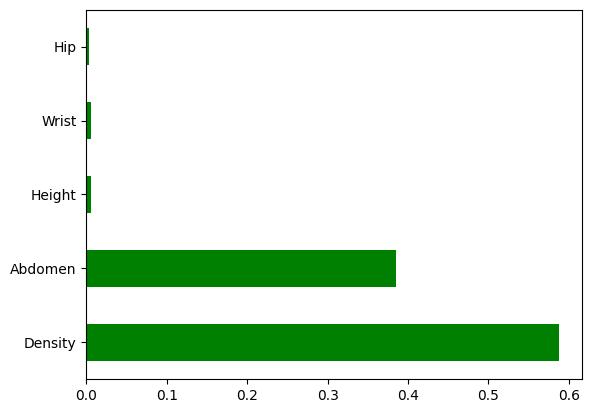

In [ ]:
series = pd.Series(etr.feature_importances_, index=train.columns)
series.nlargest(5).plot(kind='barh', color='g')

In [ ]:
etr.feature_names_in_

array(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
       'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype=object)

### Using Mutual Information Gain for Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mir = mutual_info_regression(train, test)

<Axes: >

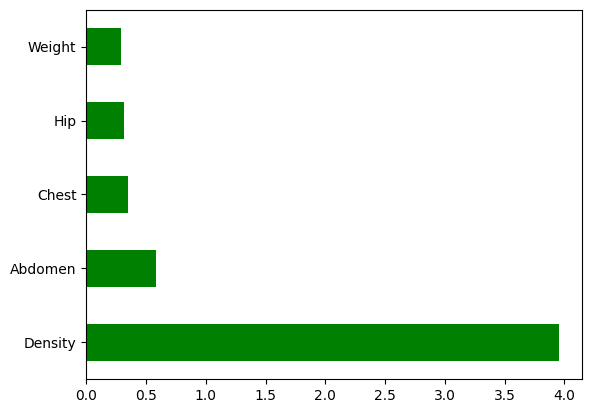

In [ ]:
plotdata = pd.Series(mir, index=train.columns)
plotdata.nlargest(5).plot(kind='barh', color = 'green')

### Removing Correlation

<Axes: >

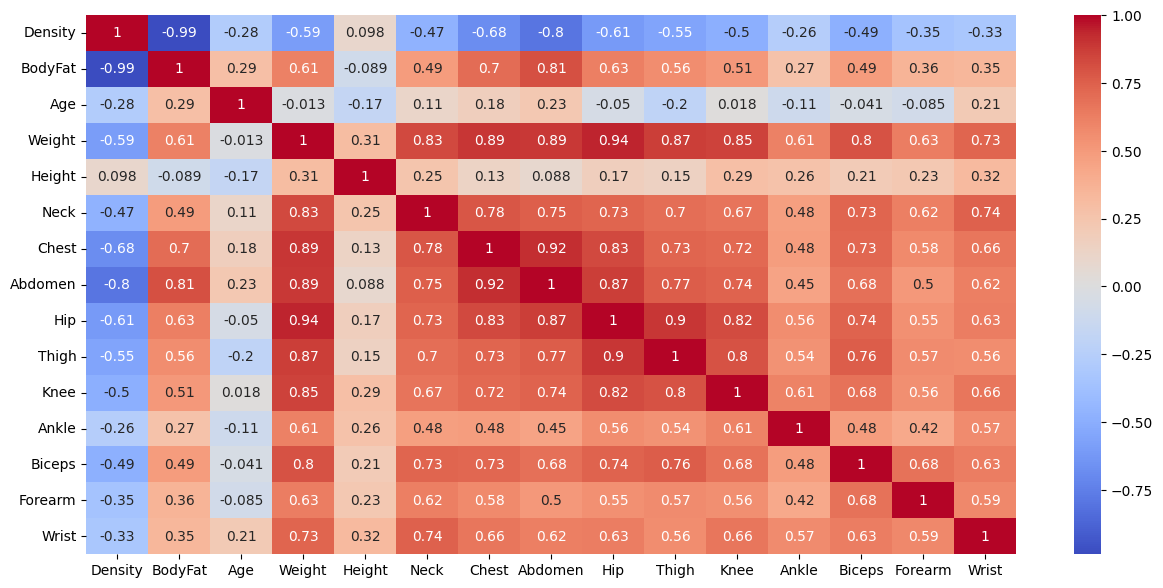

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

In [ ]:
def correlation(df, threshold):

  colcor = set()

  cormat = df.corr()

  for i in range(len(cormat)):
    for j in range(i):

      '''
      for each cell get the value of that cell by iloc[i][j], where i is the row and j is the col,
      if that abs(value) is greater than the threshold, get the col_name and add it in the set
      '''

      if abs(cormat.iloc[i][j]) > threshold:
        colname = cormat.columns[i]
        colcor.add(colname)

  return colcor

ans = correlation(train, threshold= 0.85)
ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

From the above feature selection techniques we can say that the features recommended by the Extra Tree Regressor and the mutual_information_gain are correct and from the correlation map we get to observe the similar pattern we noticed that Abdomen and Hip are having similar features/collinearity, same goes with Knee and Thigh, we can keep one of them. Also we notice that the feature Abdomen gives more feature importance in comparison to Hip, so we will be selecting that

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
temp = data[list(data.columns)]
info = pd.DataFrame()
info['VIF'] = [variance_inflation_factor(temp.values,i) for i in range(temp.shape[1])]
info['Columns'] = temp.columns
info

VIF  Columns
0   3695.622377  Density
1     33.845429  BodyFat
2     31.376101      Age
3   1238.097164   Weight
4    613.410514   Height
5   1081.965633     Neck
6   1374.457425    Chest
7   1332.624257  Abdomen
8   2933.636131      Hip
9   1017.257501    Thigh
10  1187.890413     Knee
11   356.293529    Ankle
12   419.391664   Biceps
13   454.571766  Forearm
14  1349.973920    Wrist

In [ ]:
  cols1 = list(series.nlargest(5).index)
  cols2 = list(plotdata.nlargest(5).index)

  cols1, cols2

(['Density', 'Abdomen', 'Height', 'Wrist', 'Hip'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'])

We will go with the weight and hip as hip and thigh are very much related thus we select cols1 features and drop all other features
In case that doesnot give good result then we will try with other features


In [ ]:
totrain = train[cols1]
totrain.head()

Density  Abdomen  Height  Wrist    Hip
0   1.0708     85.2   67.75   17.1   94.5
1   1.0853     83.0   72.25   18.2   98.7
2   1.0414     87.9   66.25   16.6   99.2
3   1.0751     86.4   72.25   18.2  101.2
4   1.0340    100.0   71.25   17.7  101.9

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(totrain, test, test_size = 0.2, random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(201, 5) (51, 5) (201,) (51,)


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)
plt.figure(figsize=(12,7))
tree.plot_tree(reg, filled=True)

In [ ]:
path = reg.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha = path.ccp_alphas

In [ ]:
alphalist = []
for i in range(len(ccp_alpha)):
  reg = DecisionTreeRegressor(ccp_alpha = ccp_alpha[i])
  reg.fit(x_train,y_train)
  alphalist.append(reg)

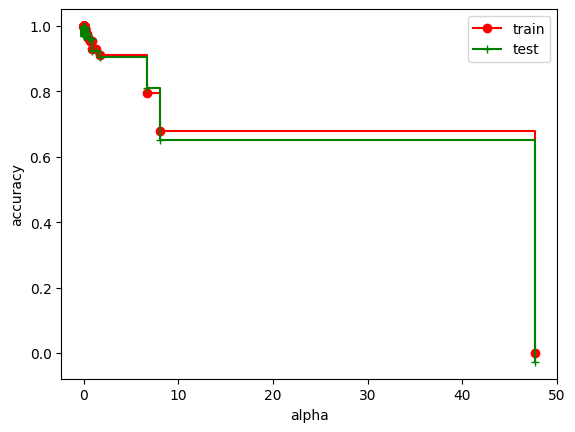

In [ ]:
train_score = [alphalist[i].score(x_train,y_train) for i in range(len(alphalist))]
test_score = [alphalist[i].score(x_test,y_test) for i in range(len(alphalist))]

plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alpha, train_score, marker = 'o', label ='train', color = 'red', drawstyle='steps-post')
plt.plot(ccp_alpha, test_score, marker = '+', label ='test', color = 'green', drawstyle='steps-post')
plt.legend()
plt.show()

In [ ]:
# Decision Tree

dt = DecisionTreeRegressor(ccp_alpha=1,)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print(f'Decision Tree-Normal Approach: {metrics.r2_score(y_test,y_pred_dt)}')


# Random Forest
rf = RandomForestRegressor(ccp_alpha=1)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(f'Decision Tree-Normal Approach: {metrics.r2_score(y_test,y_pred_rf)}')

Decision Tree-Normal Approach: 0.9237637312248695
Decision Tree-Normal Approach: 0.9698890650532793


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    'Random Forest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators' : [int(x) for x in np.linspace(start=1, stop=1200, num=10)],
            'criterion' : ['squared_error', 'absolute_error'],
            'max_depth' : [int(x) for x in np.linspace(start = 1, stop = 30, num= 5)],
            'min_samples_split' : [2,5,10,12],
            'min_samples_leaf' : [2,5,10,12],
            'max_features' : ['auto', 'sqrt'],
            'ccp_alpha' : [1,2,2.5,3,3.5,4,5]
        }
    },
    'Decision Tree':{
        'model' : DecisionTreeRegressor(),
        'params':{
            'criterion': ["squared_error", "absolute_error"],
            'splitter' : ['best', 'random'],
            'min_samples_split' : [2,5,10,12],
            'min_samples_leaf' : [2,5,10,12],
            'max_features' : ['auto', 'sqrt'],
            'ccp_alpha' : [1,2,2.5,3,3.5,4,5]
        }
    },
    'SVM':{
        'model' : SVR(),
        'params' :{
            'C': [0.25,0.5,0.75,1.0],
            'tol': [1e-10, 1e-5, 1e-4, 0.025, 0.5,0.75],
            'kernel': ['linear', 'poly','rbf','sigmoid'],
            'max_iter' : [int(x) for x in np.linspace(start=1, stop = 250, num=10)]
        }
    }
}

In [ ]:
RandomizedSearchCV,
scores = []

for modelname, mp in params.items():
  clf = RandomizedSearchCV(mp['model'], param_distributions = mp['params'],
                           cv=5, n_iter=10, scoring='neg_mean_squared_error', error_score='raise')

  clf.fit(x_train,y_train)
  scores.append({
      'model_name': modelname,
      'best_score': clf.best_score_,
      'best_estimator': clf.best_estimator_
  })

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [ ]:
scores

[{'model_name': 'Random Forest',
  'best_score': -3.9182558307145086,
  'best_estimator': RandomForestRegressor(ccp_alpha=1, max_depth=15, max_features='auto',
                        min_samples_leaf=2, min_samples_split=10,
                        n_estimators=800)},
 {'model_name': 'Decision Tree',
  'best_score': -8.90075389089881,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=3, max_features='auto', min_samples_leaf=2)},
 {'model_name': 'SVM',
  'best_score': -33.60638930006229,
  'best_estimator': SVR(C=0.25, kernel='poly', max_iter=139, tol=0.0001)}]

In [ ]:
rf1 = scores[0]['best_estimator']
rf1.fit(x_train, y_train)

y_pred_rf1 = rf1.predict(x_test)
print(metrics.r2_score(y_test, y_pred_rf1))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.971265457705273


In [ ]:
totrainlist = np.array(totrain)
predicted = []

for i in range(len(totrainlist)):
  predicted.append(rf1.predict([totrainlist[i]]))

totrain['Actual_result'] = test
totrain['Predicted_result'] = np.array(predicted)
totrain

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Density  Abdomen  Height  Wrist    Hip  Actual_result  Predicted_result
0     1.0708     85.2   67.75   17.1   94.5           12.3         13.604305
1     1.0853     83.0   72.25   18.2   98.7            6.1          7.182276
2     1.0414     87.9   66.25   16.6   99.2           25.3         24.880431
3     1.0751     86.4   72.25   18.2  101.2           10.4          9.128338
4     1.0340    100.0   71.25   17.7  101.9           28.7         29.994526
..       ...      ...     ...    ...    ...            ...               ...
247   1.0736     83.6   67.00   18.5   88.8           11.0          9.471513
248   1.0236    105.0   69.75   20.1  104.5           33.6         31.961698
249   1.0328    111.5   66.00   18.0  101.7           29.3         30.163724
250   1.0399    101.3   70.50   19.8   97.8           26.0         25.442698
251   1.0271    108.5   70.00   20.9  107.1           31.9         31.348305

[252 rows x 7 columns]

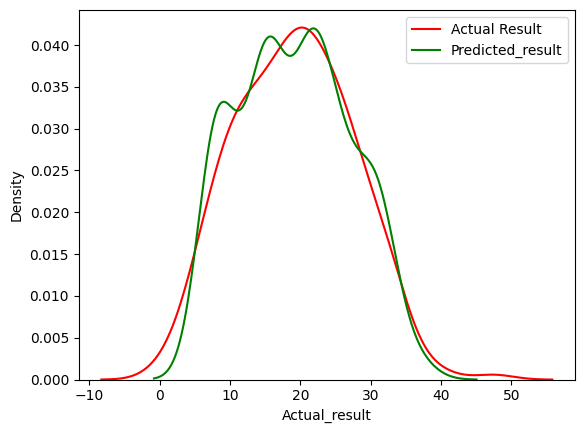

In [ ]:
sns.kdeplot(totrain['Actual_result'], label='Actual Result', color= 'red')
sns.kdeplot(totrain['Predicted_result'], label='Predicted_result', color= 'green')
plt.legend()
plt.show()

In [ ]:
import pickle

file = open('bodyfatmodel1.pkl', 'wb')
pickle.dump(rf1, file)
file.close()